In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/airlines-flights-data/airlines_flights_data.csv


In [2]:
df=pd.read_csv('/kaggle/input/airlines-flights-data/airlines_flights_data.csv')
df

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [4]:
df.columns

Index(['index', 'airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

In [5]:
df.isnull().sum()

index               0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [6]:
df.describe()

,index,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


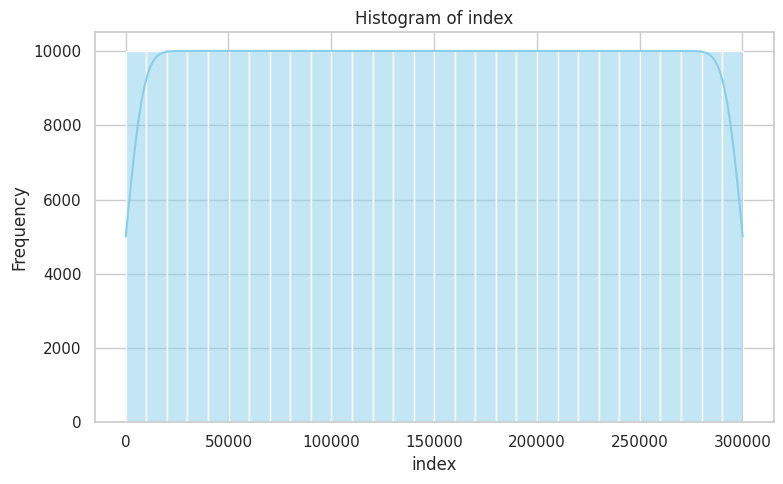

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


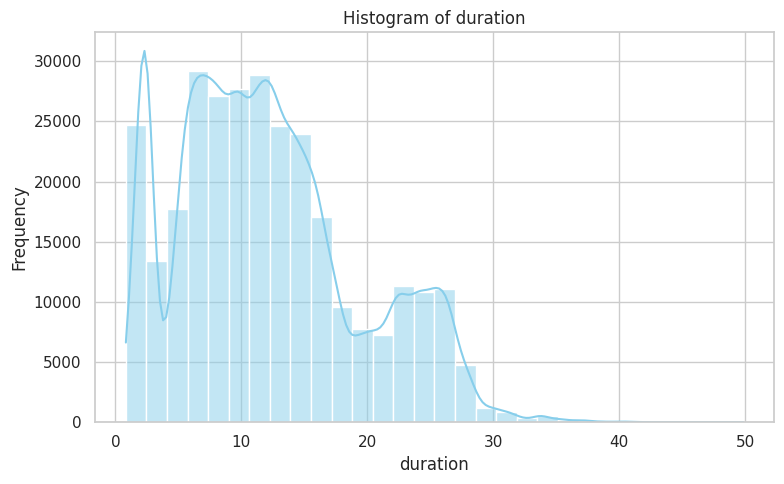

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


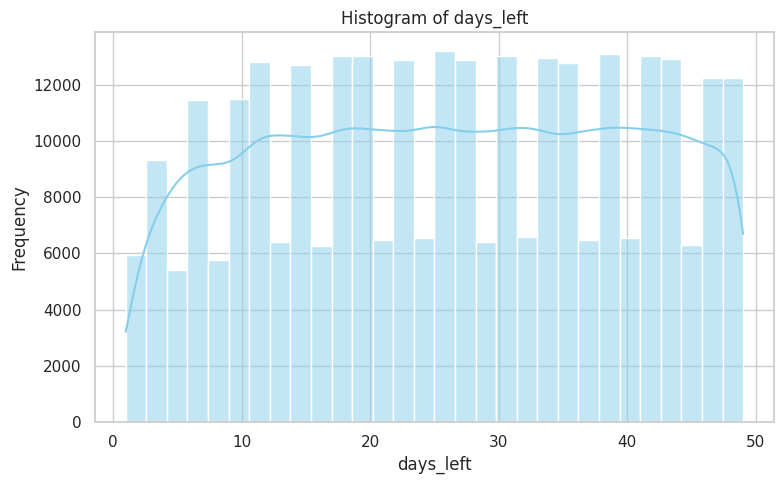

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


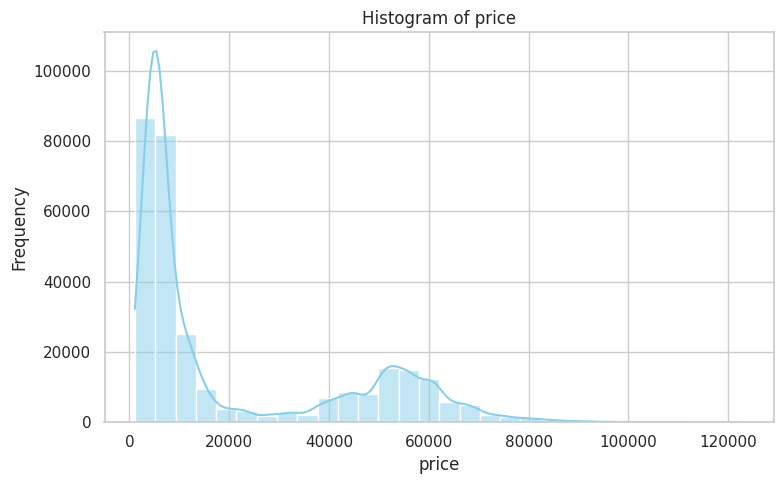

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/kaggle/input/airlines-flights-data/airlines_flights_data.csv')

# Set style
sns.set(style="whitegrid")

# Plot histograms for all numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col].dropna(), kde=True, bins=30, color='skyblue')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()


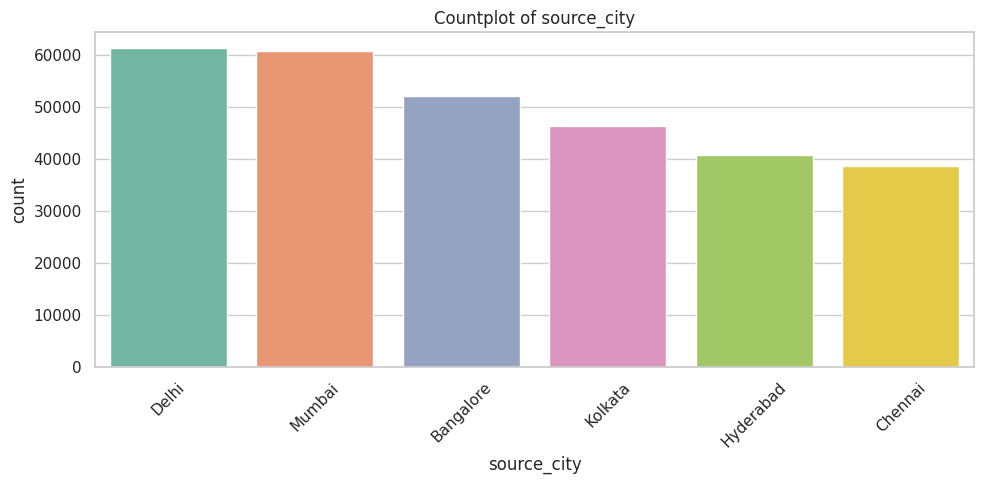

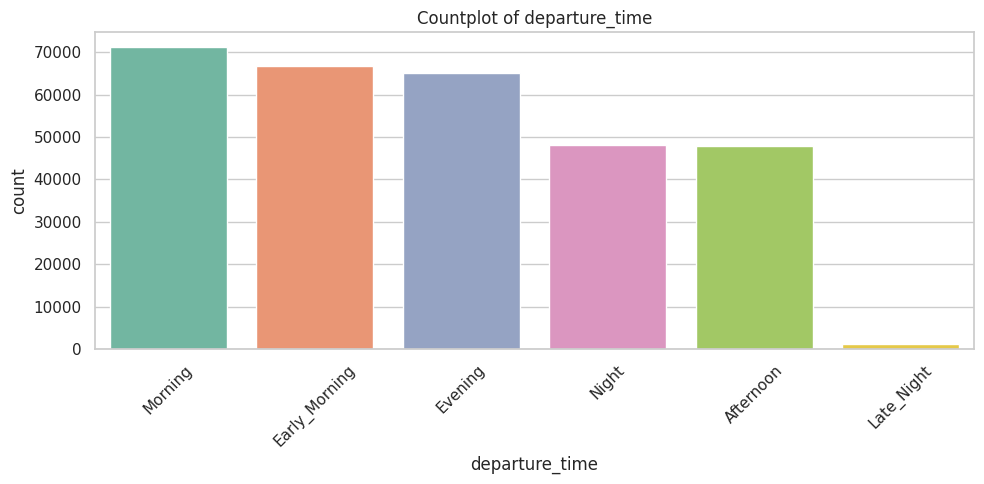

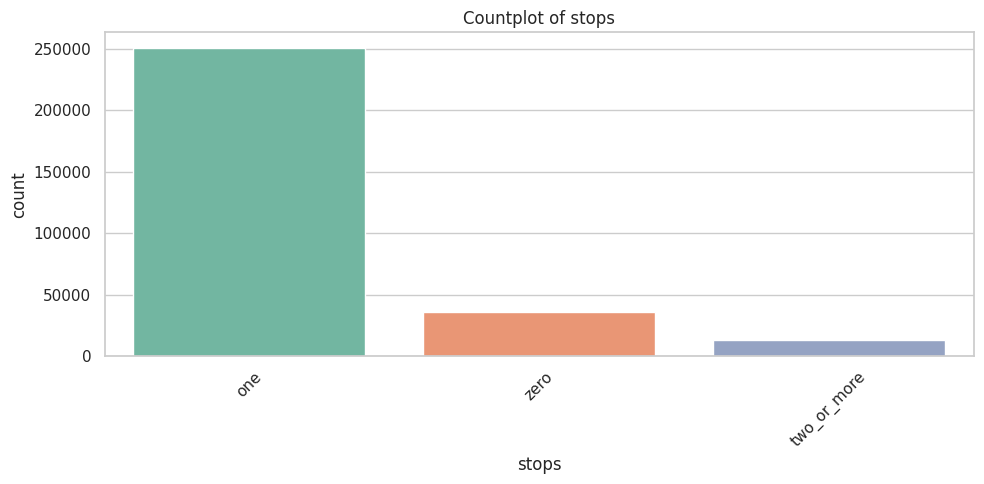

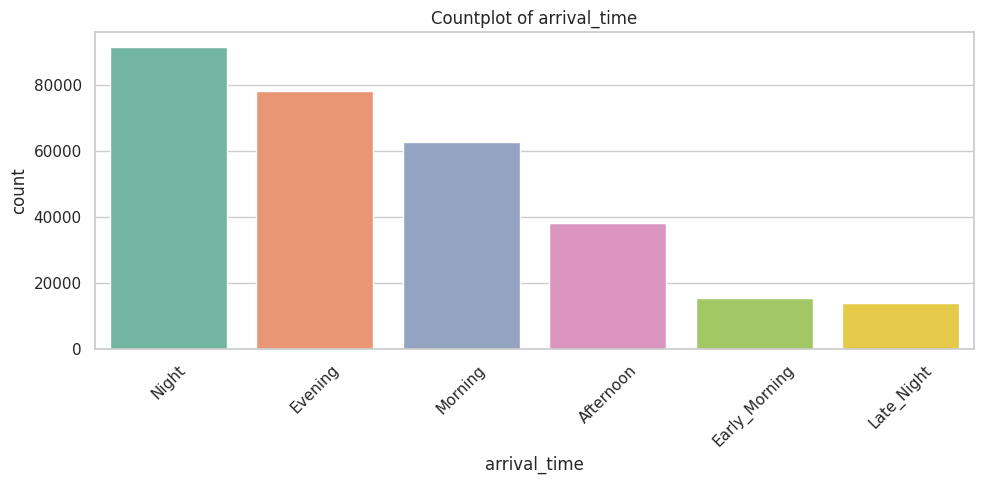

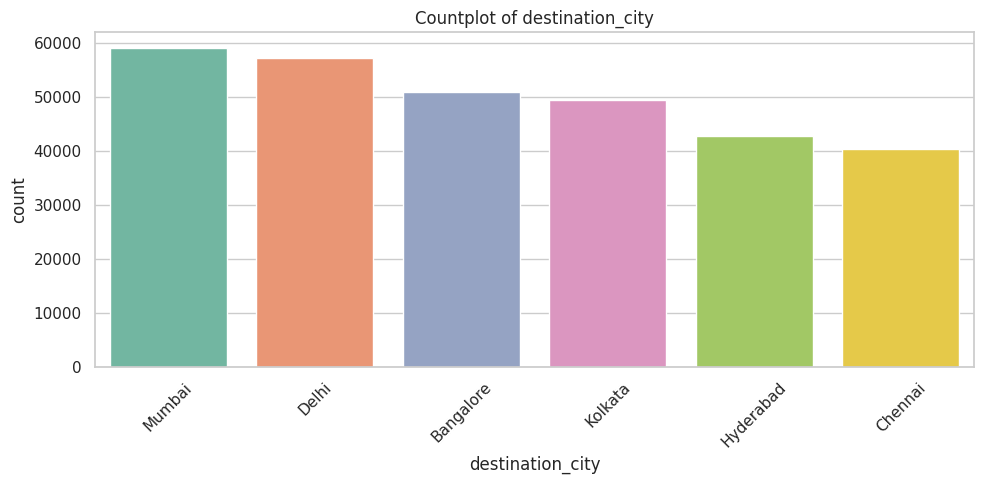

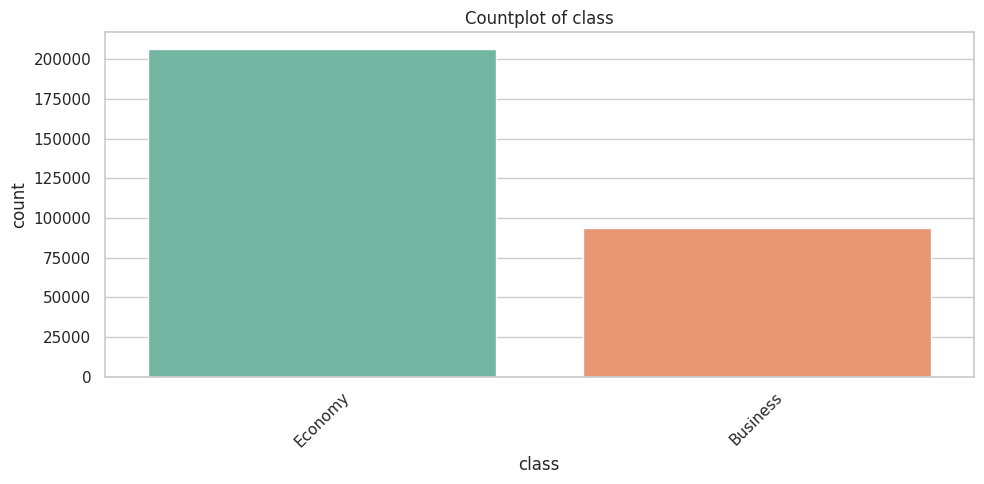

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('/kaggle/input/airlines-flights-data/airlines_flights_data.csv')

# Set plot style
sns.set(style="whitegrid")

# List of columns to plot
categorical_cols = ['source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class']

# Loop through each column and create countplot
for col in categorical_cols:
    if col in df.columns:
        plt.figure(figsize=(10, 5))
        sns.countplot(x=col, data=df, palette='Set2', order=df[col].value_counts().index)
        plt.title(f'Countplot of {col}')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    else:
        print(f"Column '{col}' not found in dataset.")


Numeric Columns:
 Index(['index', 'duration', 'days_left', 'price'], dtype='object')

Categorical Columns:
 Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class'],
      dtype='object')


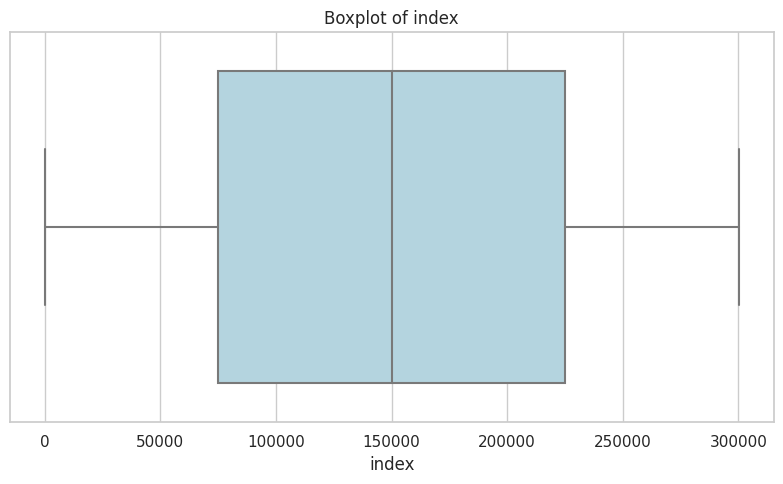

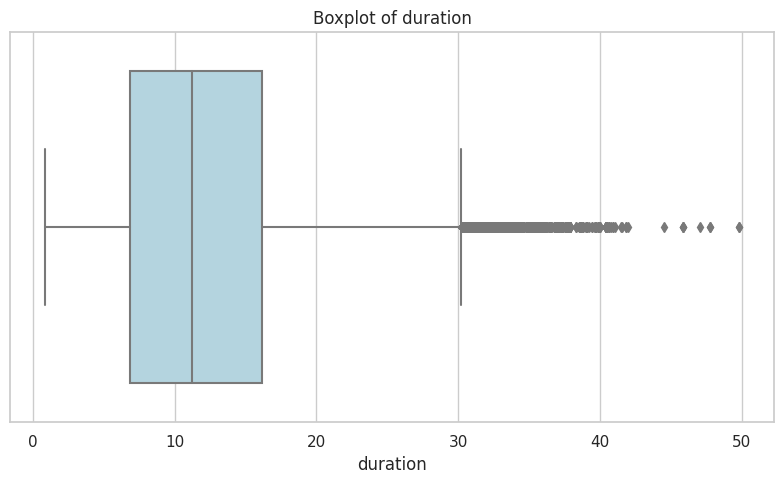

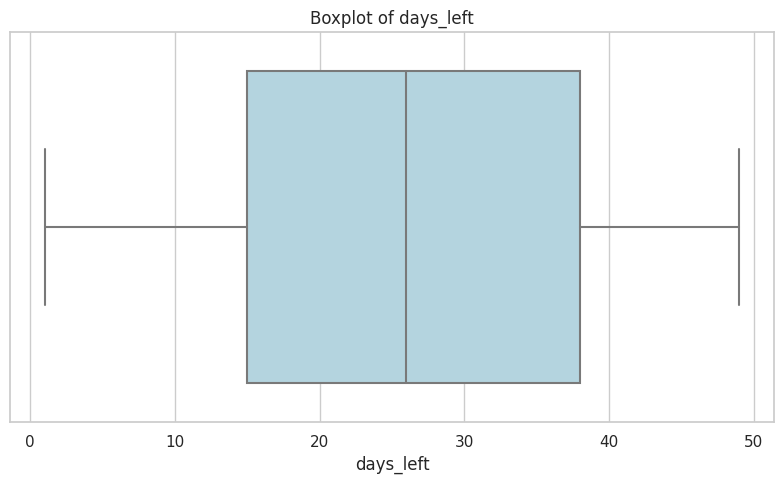

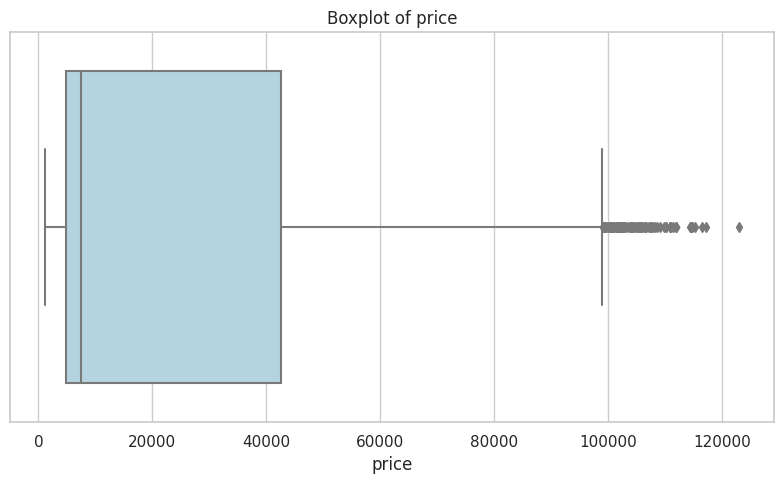

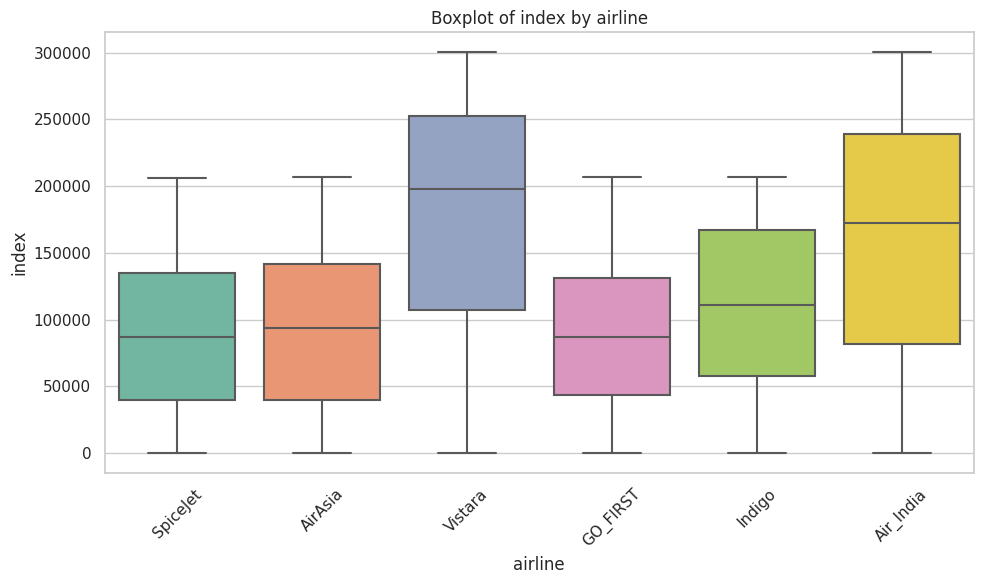

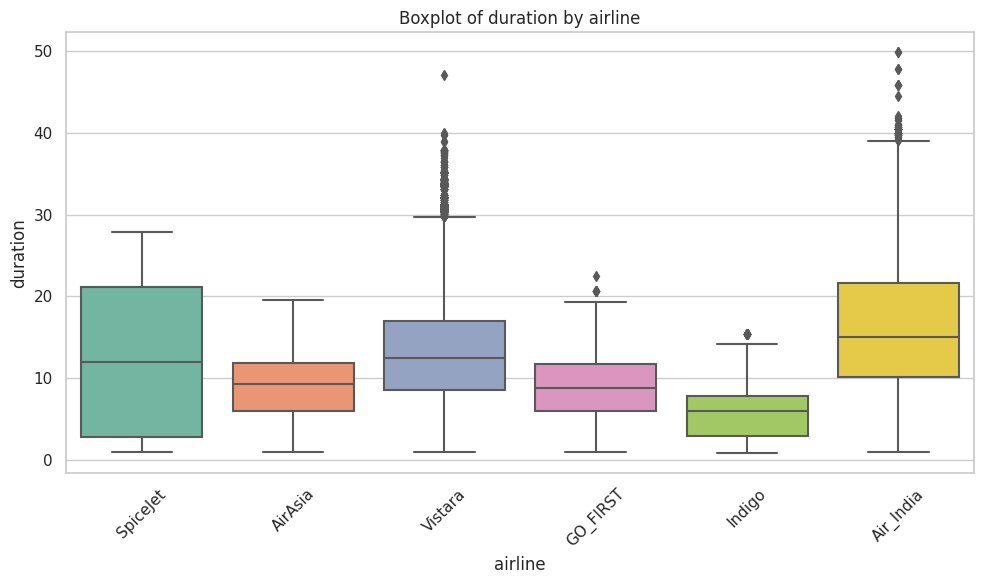

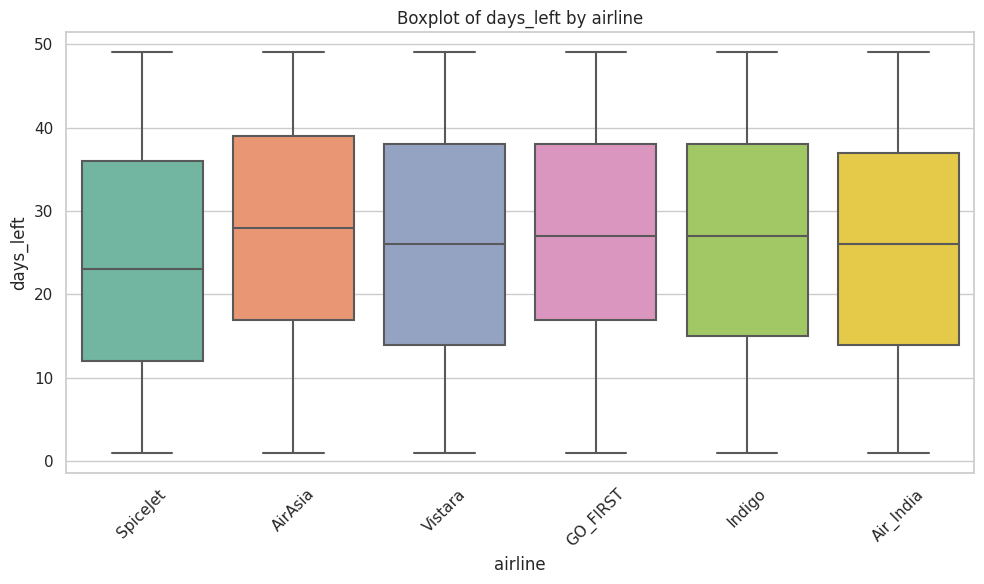

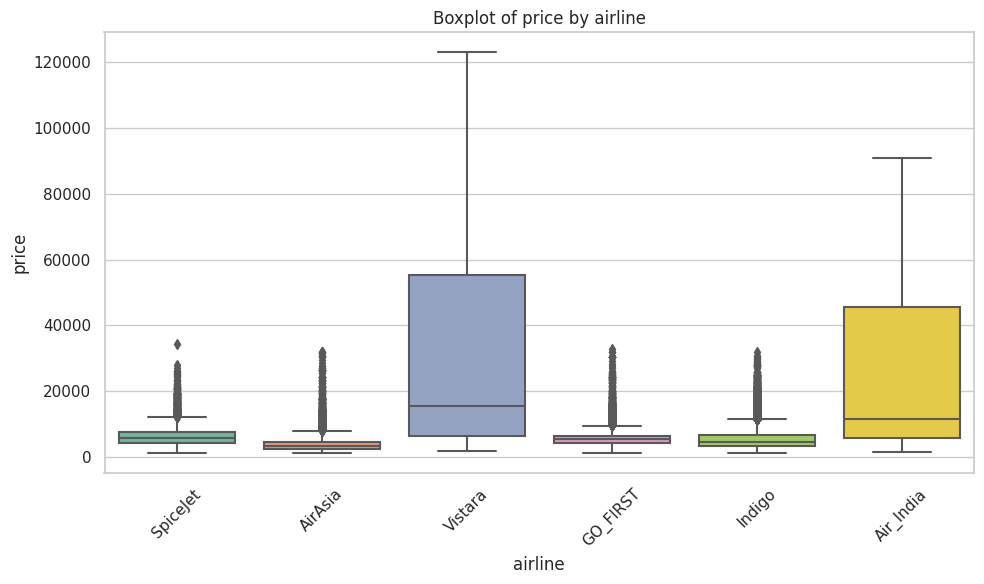

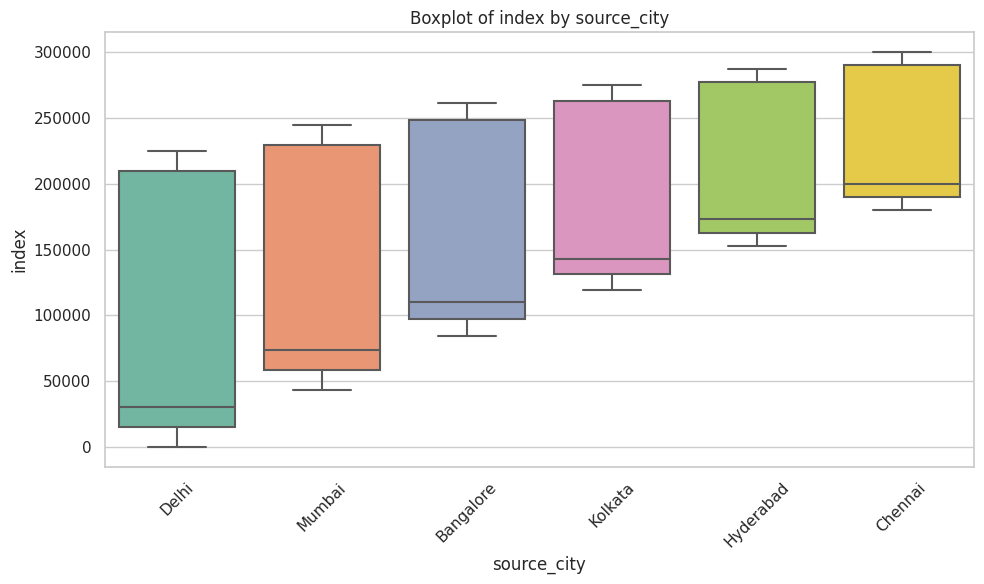

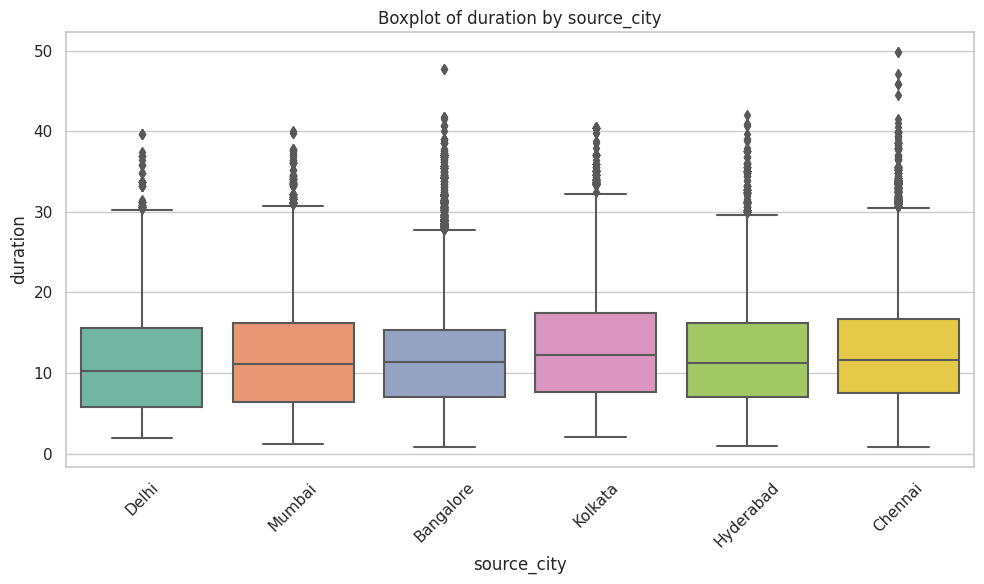

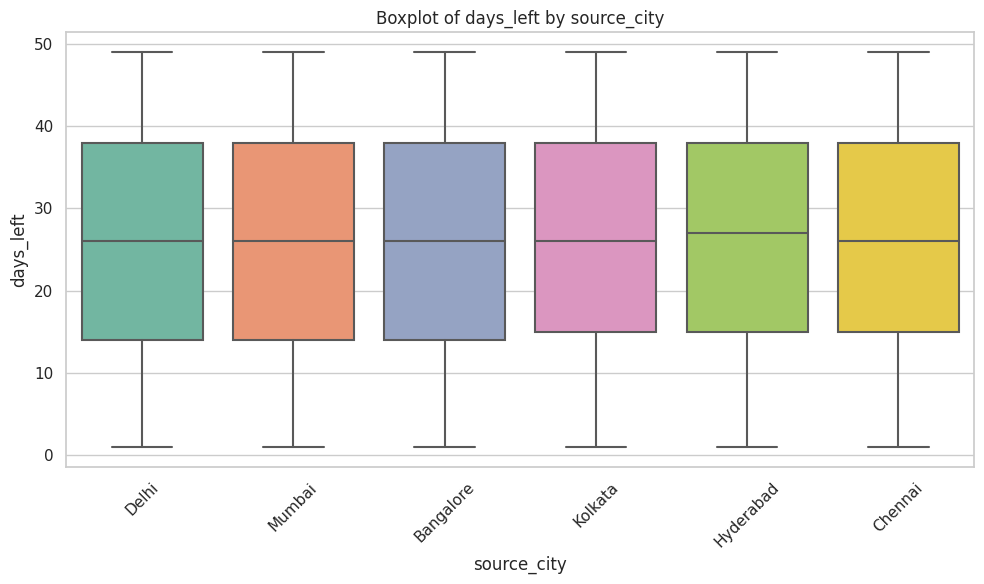

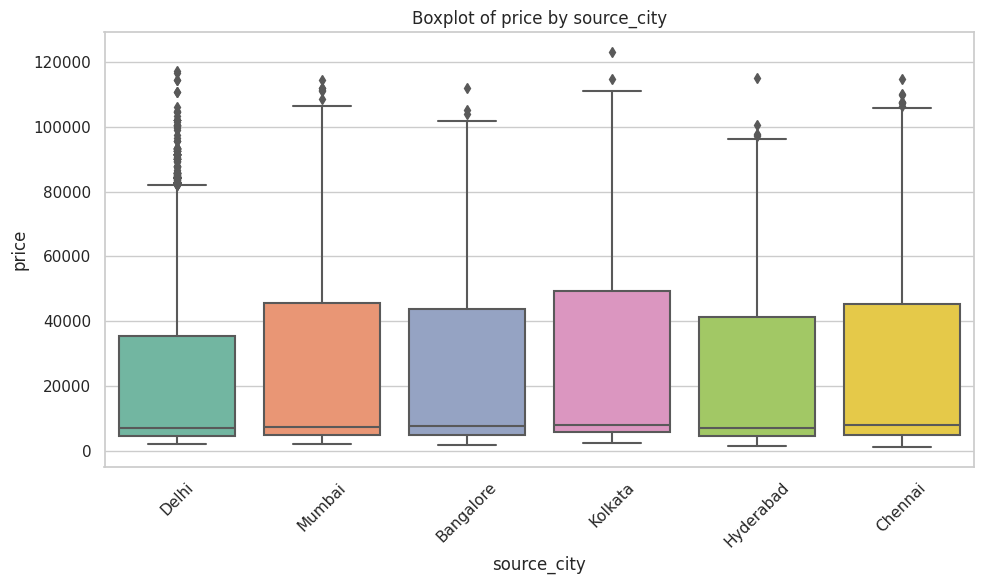

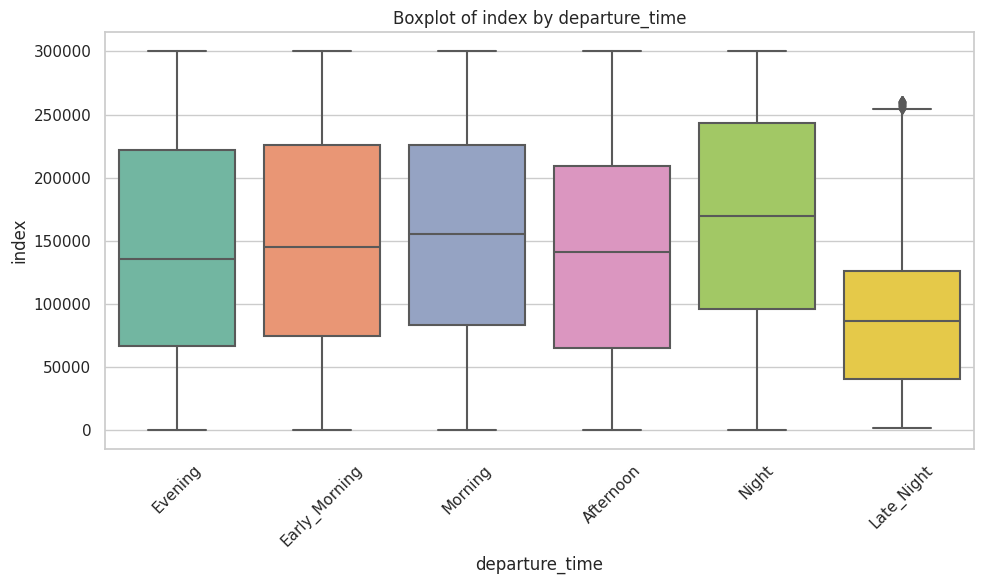

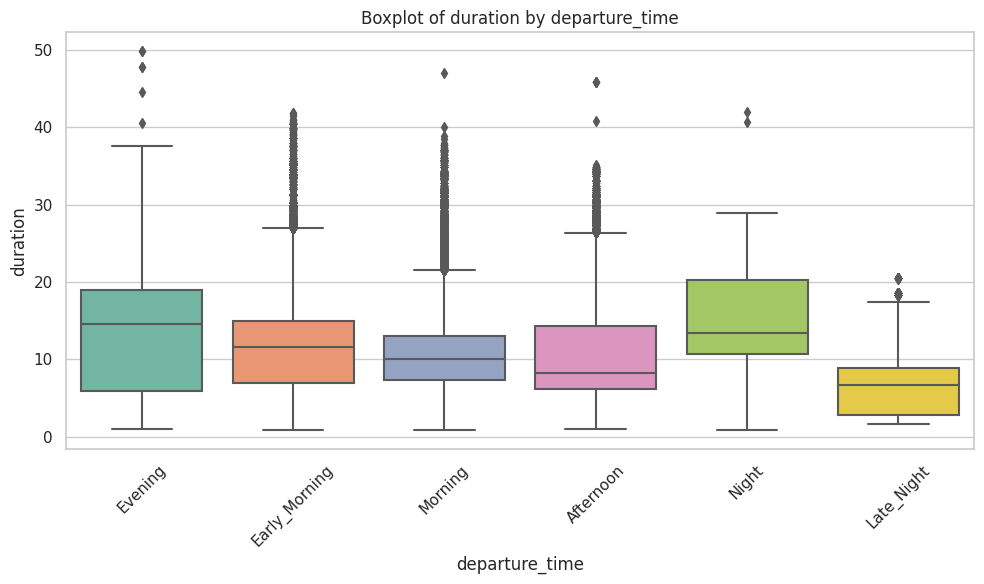

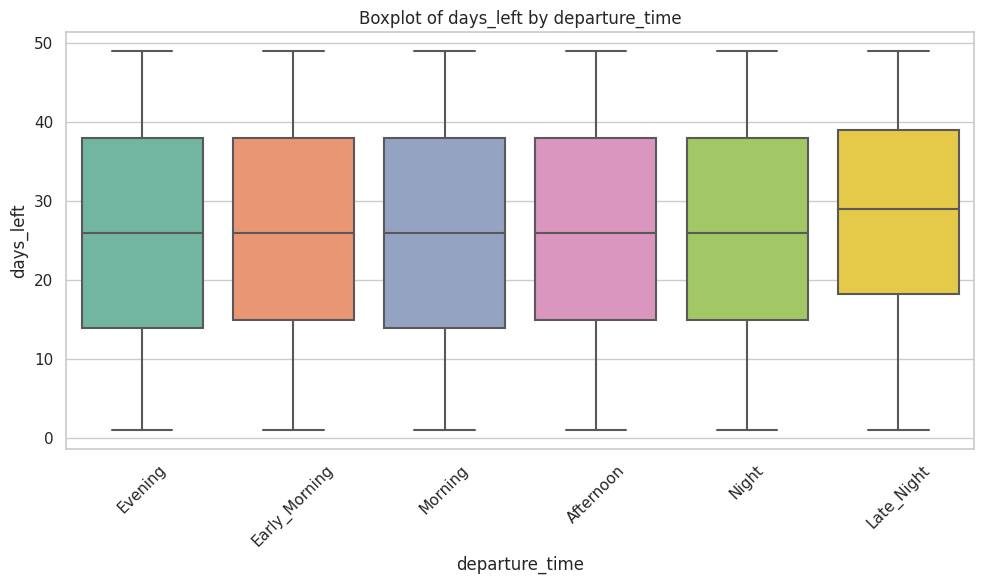

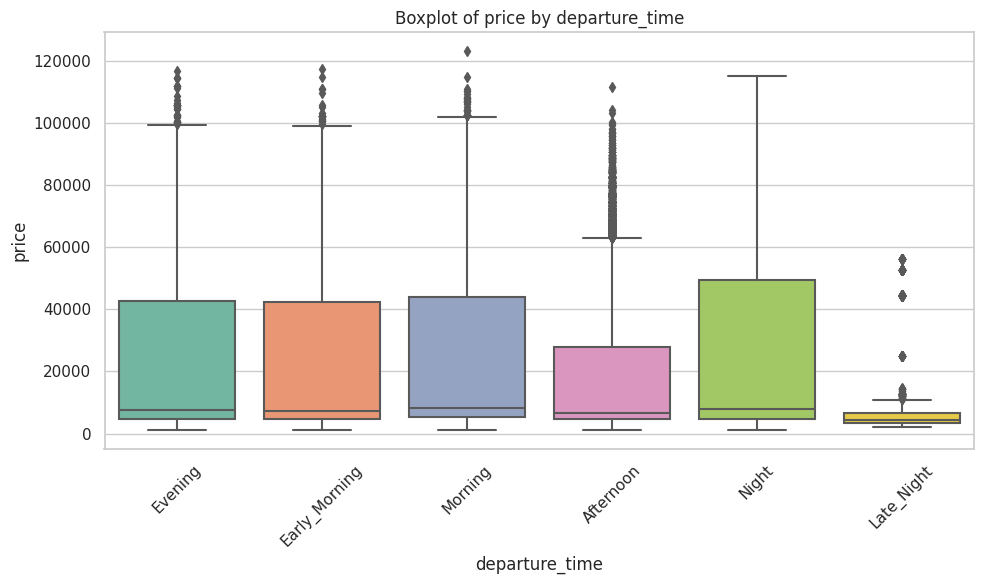

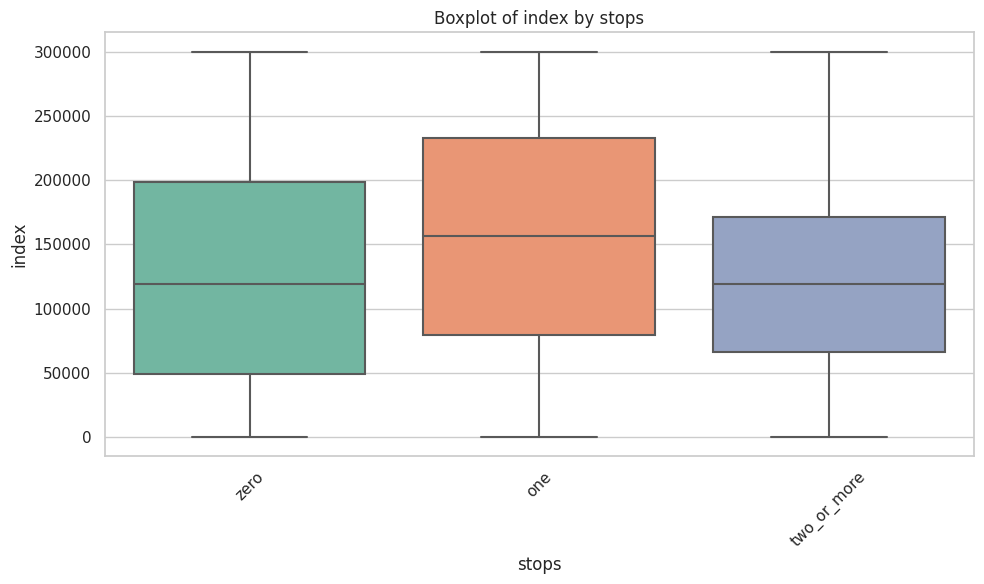

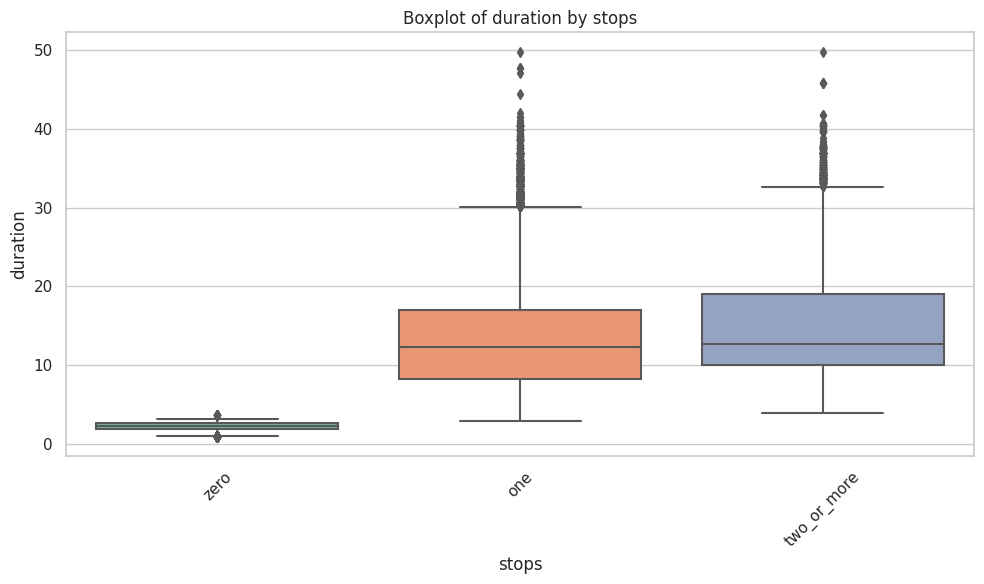

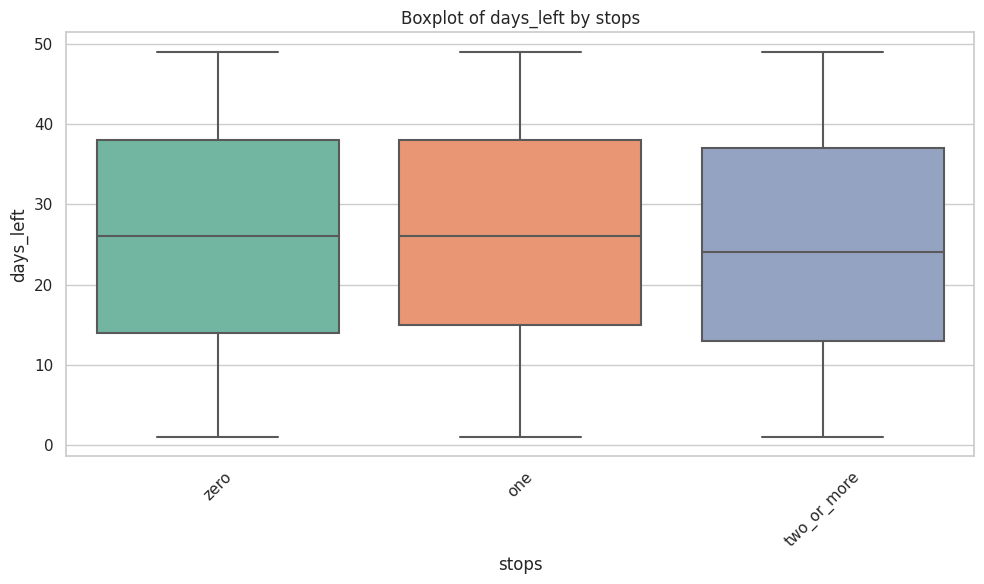

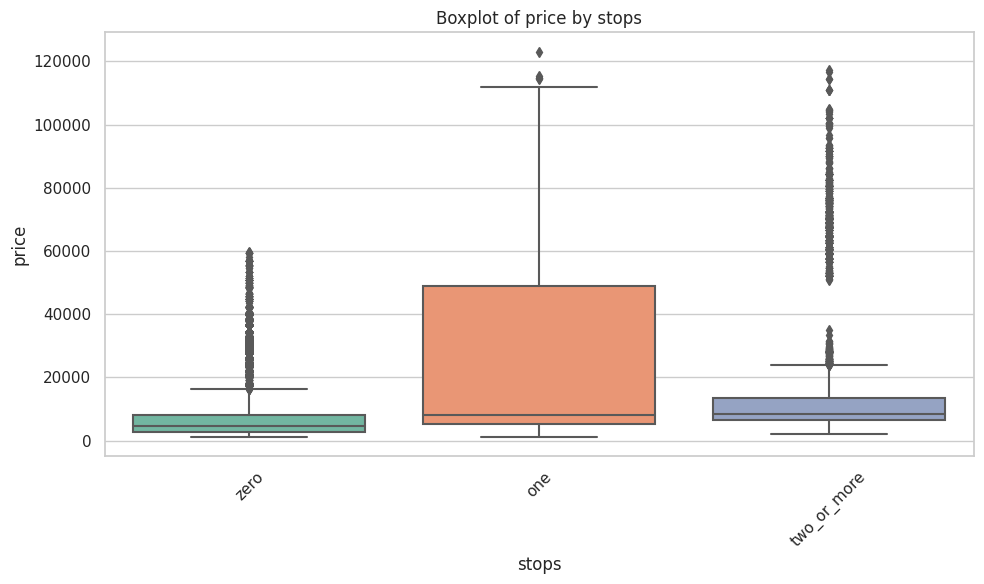

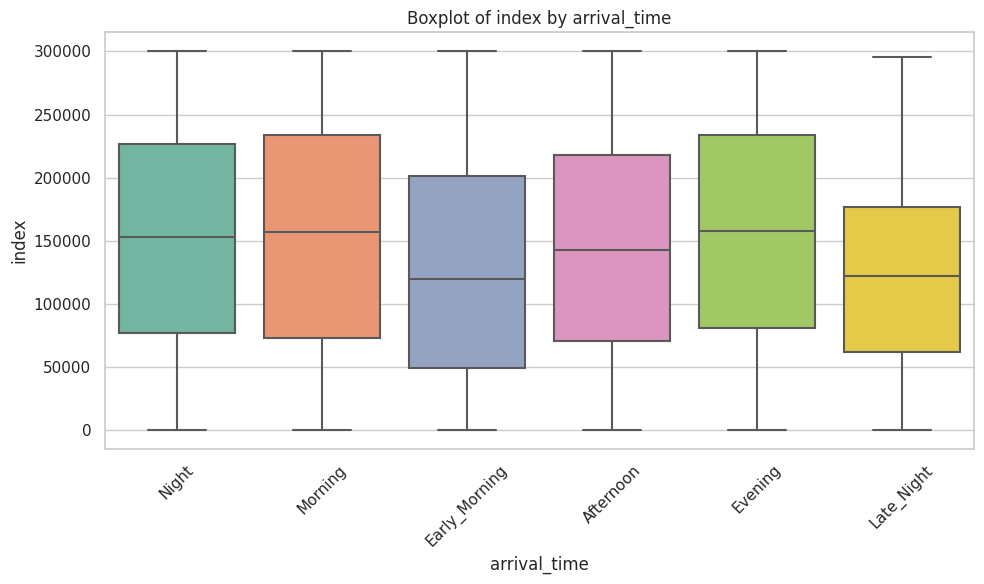

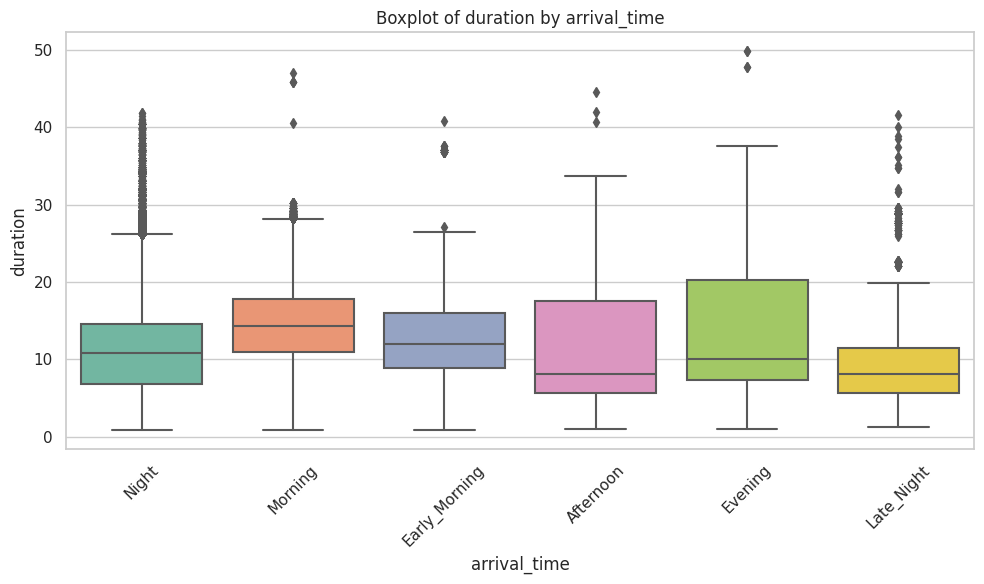

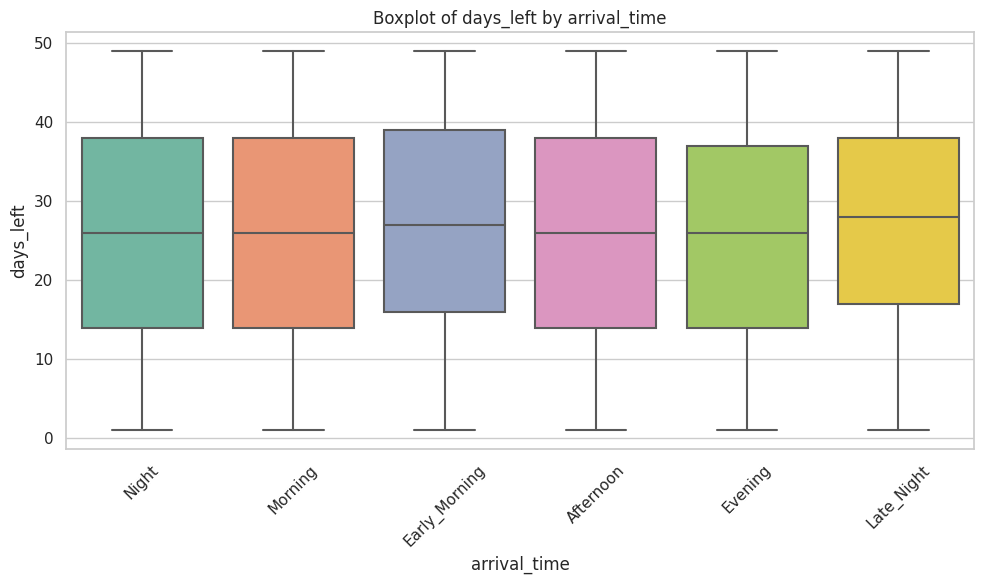

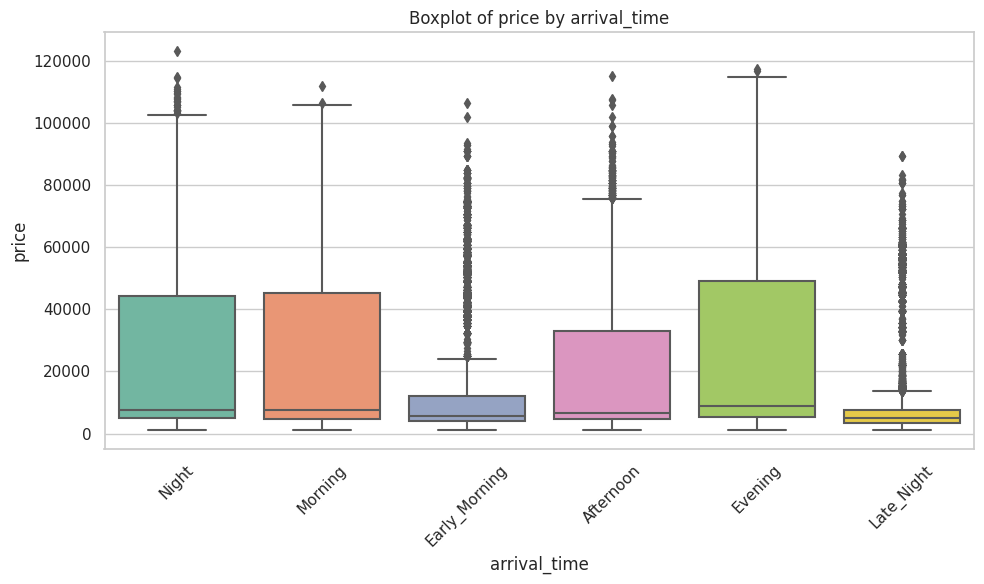

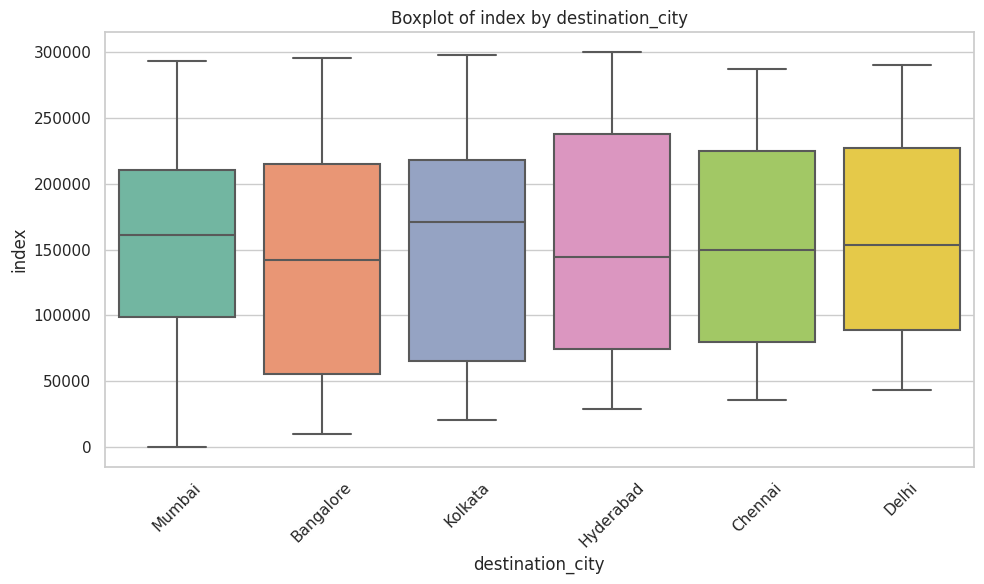

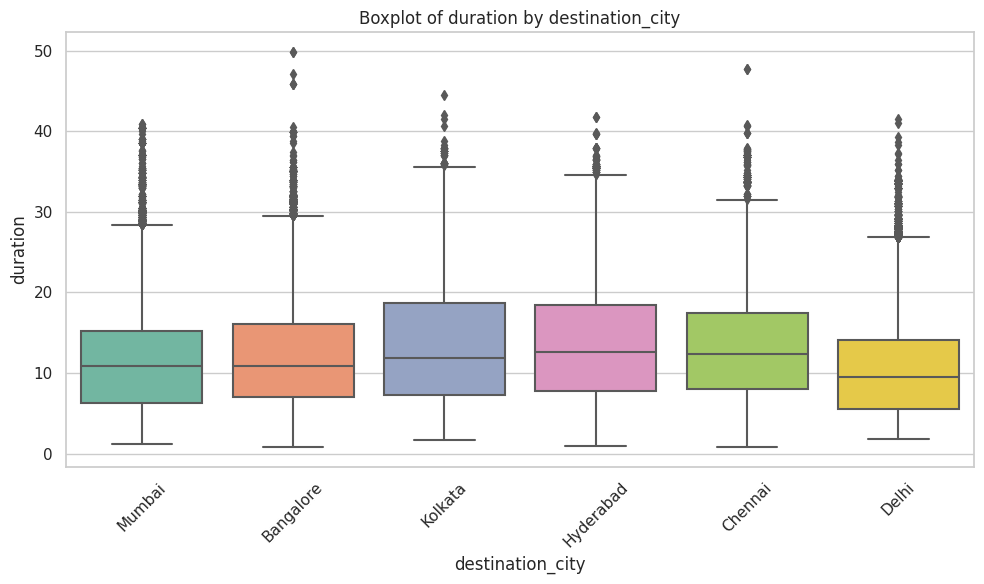

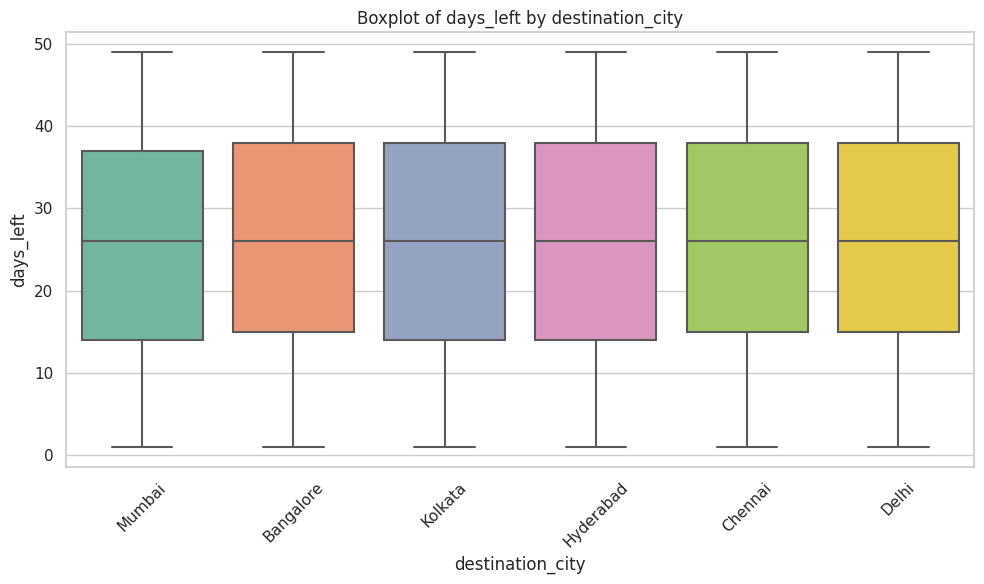

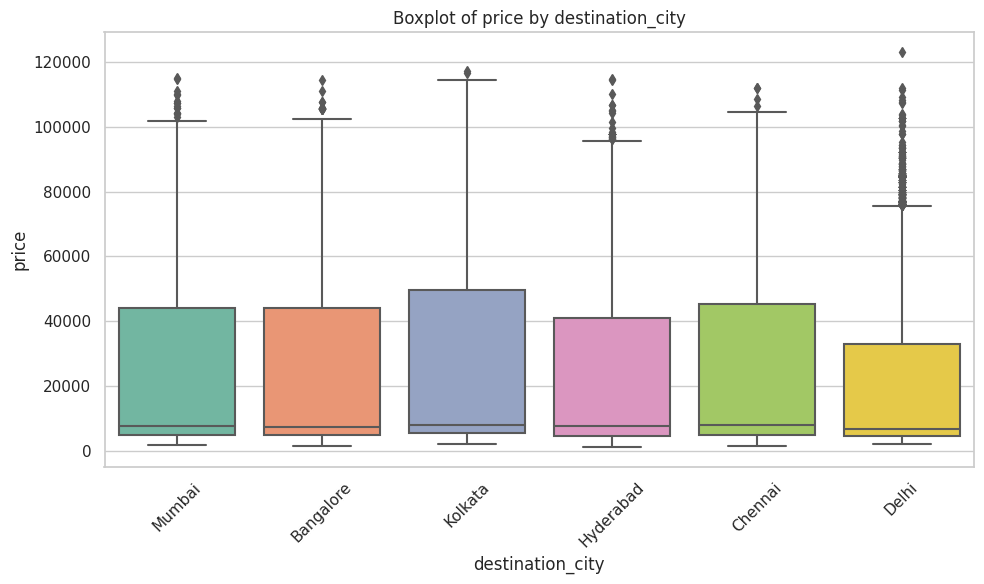

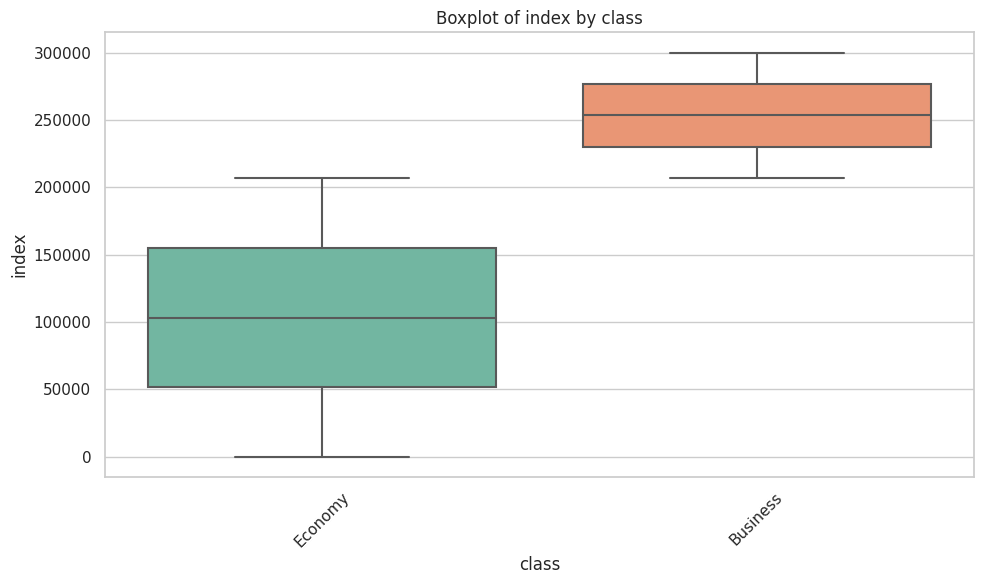

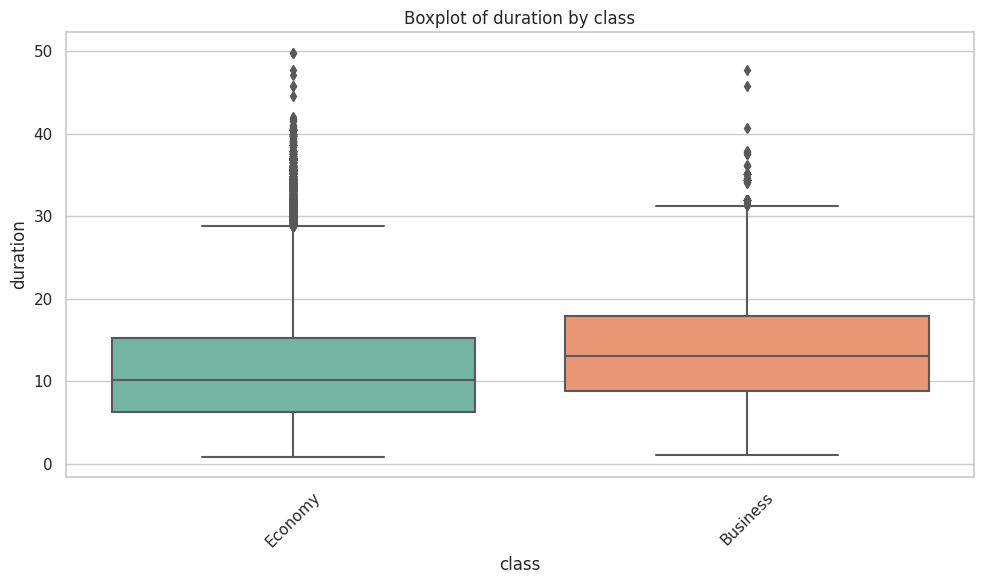

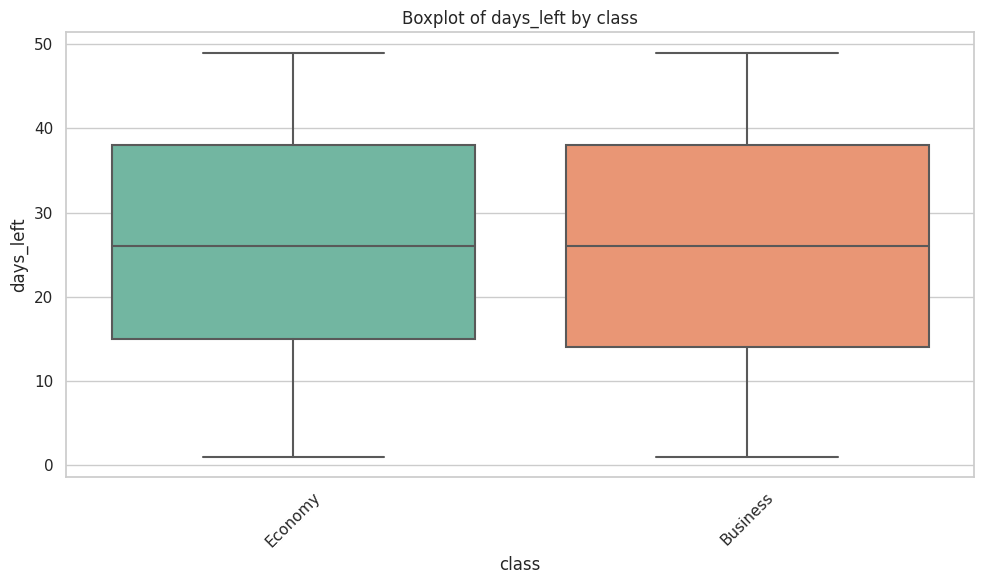

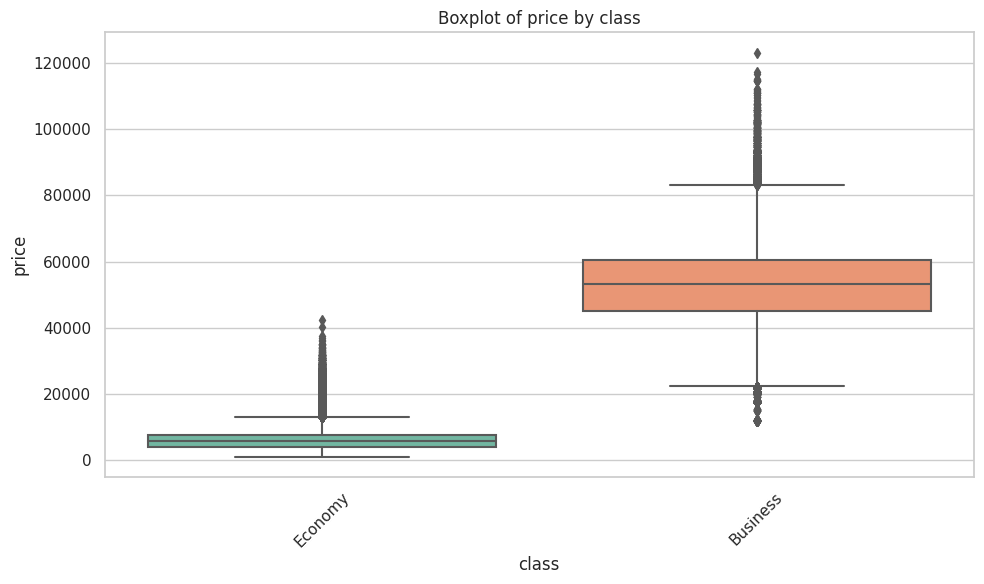

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('/kaggle/input/airlines-flights-data/airlines_flights_data.csv')

# Set style
sns.set(style="whitegrid")

# Identify numeric and categorical columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

print("Numeric Columns:\n", numeric_cols)
print("\nCategorical Columns:\n", categorical_cols)

# Boxplots of each numeric column (distribution overview)
for col in numeric_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df[col], color='lightblue')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()

# Boxplots of numeric columns grouped by categorical variables
for cat in categorical_cols:
    # Skip if too many unique categories
    if df[cat].nunique() > 10:
        continue

    for num in numeric_cols:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=cat, y=num, data=df, palette='Set2')
        plt.title(f'Boxplot of {num} by {cat}')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


Correlation Matrix:
               index  duration  days_left     price
index      1.000000  0.159007   0.014638  0.761177
duration   0.159007  1.000000  -0.039157  0.204222
days_left  0.014638 -0.039157   1.000000 -0.091949
price      0.761177  0.204222  -0.091949  1.000000


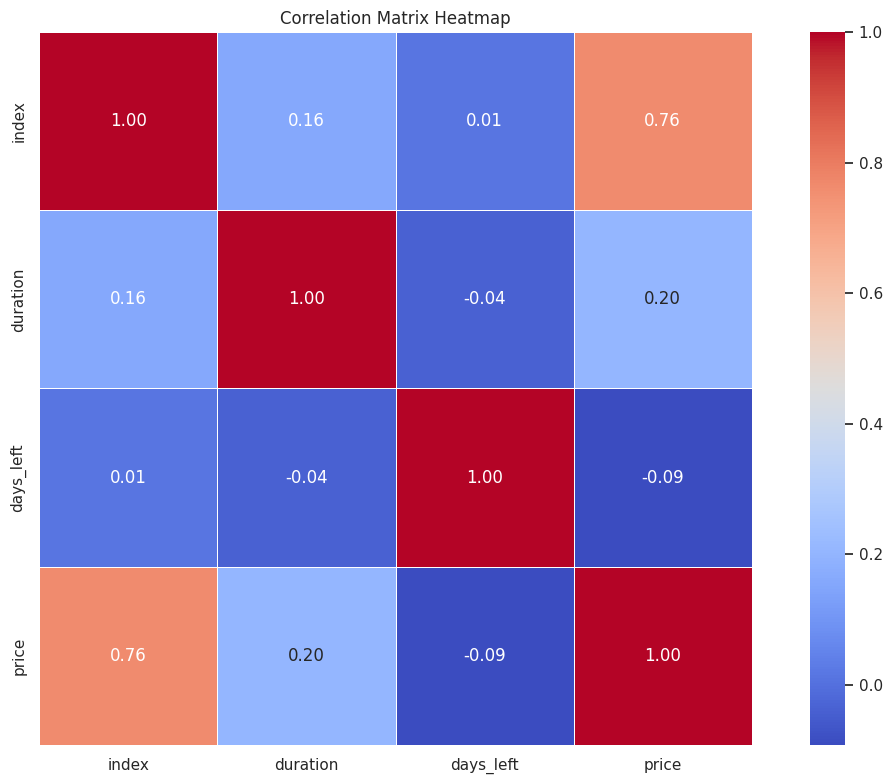

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('/kaggle/input/airlines-flights-data/airlines_flights_data.csv')

# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Display correlation matrix
print("Correlation Matrix:\n", corr_matrix)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.tight_layout()
plt.show()


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor

# 1. Load dataset
df = pd.read_csv('/kaggle/input/airlines-flights-data/airlines_flights_data.csv')

# 2. Drop rows with missing target or features
df = df.dropna(subset=['price'])

# 3. Encode categorical variables
df = df.copy()
label_encoders = {}
for col in df.select_dtypes(include=['object', 'category']):
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

# 4. Define features and target
X = df.drop(['price'], axis=1)
y = df['price']

# 5. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 7. Define models
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "DecisionTree": DecisionTreeRegressor(random_state=42),
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42),
    "GradientBoosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42)
}

# 8. Train, predict and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(f"\n{name} Results:")
    print("R² Score:", round(r2_score(y_test, preds), 4))
    print("MAE:", round(mean_absolute_error(y_test, preds), 2))
    print("RMSE:", round(np.sqrt(mean_squared_error(y_test, preds)), 2))



LinearRegression Results:
R² Score: 0.9046
MAE: 4622.93
RMSE: 7012.68

Ridge Results:
R² Score: 0.9046
MAE: 4622.94
RMSE: 7012.68

DecisionTree Results:
R² Score: 0.9859
MAE: 755.9
RMSE: 2696.8

RandomForest Results:
R² Score: 0.9911
MAE: 771.08
RMSE: 2137.66

GradientBoosting Results:
R² Score: 0.9594
MAE: 2714.53
RMSE: 4574.15

XGBoost Results:
R² Score: 0.9839
MAE: 1574.96
RMSE: 2876.68


2025-08-01 07:16:45.591536: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1754032605.839634      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1754032605.908631      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-08-01 07:17:01.890330: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call 

Epoch 1/5
6004/6004 ━━━━━━━━━━━━━━━━━━━━ 26s 4ms/step - loss: 2.8102 - mae: 0.9048 - val_loss: 0.1129 - val_mae: 0.2689
Epoch 2/5
6004/6004 ━━━━━━━━━━━━━━━━━━━━ 24s 4ms/step - loss: 0.3550 - mae: 0.4702 - val_loss: 0.0571 - val_mae: 0.1774
Epoch 3/5
6004/6004 ━━━━━━━━━━━━━━━━━━━━ 24s 4ms/step - loss: 0.2285 - mae: 0.3766 - val_loss: 0.0548 - val_mae: 0.1789
Epoch 4/5
6004/6004 ━━━━━━━━━━━━━━━━━━━━ 24s 4ms/step - loss: 0.1641 - mae: 0.3183 - val_loss: 0.0399 - val_mae: 0.1461
Epoch 5/5
6004/6004 ━━━━━━━━━━━━━━━━━━━━ 24s 4ms/step - loss: 0.1190 - mae: 0.2692 - val_loss: 0.0494 - val_mae: 0.1787
1876/1876 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step

✅ Neural Network RMSE: 4794.34
R² Score: 0.9554


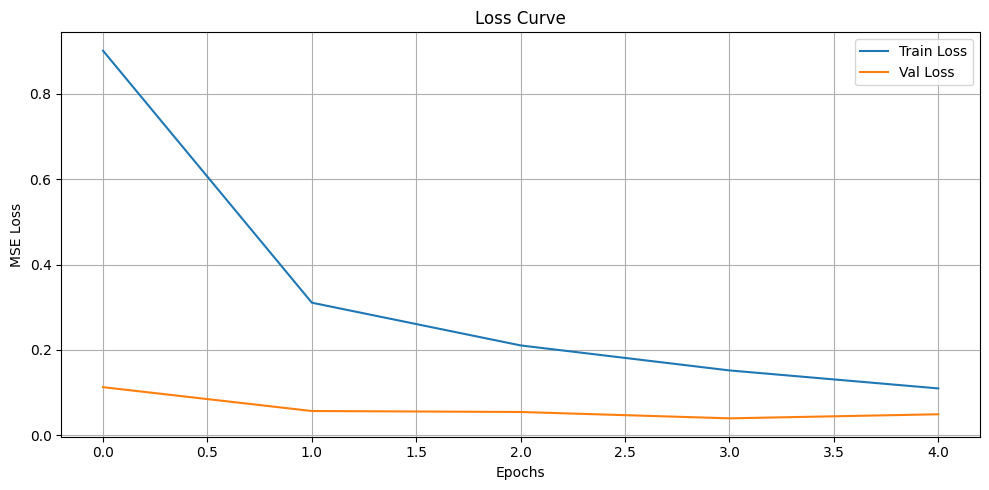

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# 1. Load data
df = pd.read_csv('/kaggle/input/airlines-flights-data/airlines_flights_data.csv')

# 2. Drop missing target
df = df.dropna(subset=['price'])

# 3. Separate features and target
X = df.drop('price', axis=1)
y = df['price']

# Optional: log1p transform target to reduce skew
y_log = np.log1p(y)

# 4. Identify column types
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

# 5. Preprocessing pipeline
preprocessor = ColumnTransformer(transformers=[
    ('num', Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ]), numeric_cols),
    ('cat', Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(handle_unknown='ignore'))
    ]), categorical_cols)
])

# 6. Preprocess data
X_processed = preprocessor.fit_transform(X)

# 7. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_processed, y_log, test_size=0.2, random_state=42)

# 8. Neural Network architecture
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.1),
    Dense(1)  # Output layer for regression
])

# 9. Compile model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# 10. Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# 11. Train model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=5,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# 12. Predict and inverse transform
y_pred_log = model.predict(X_test).flatten()
y_pred = np.expm1(y_pred_log)
y_actual = np.expm1(y_test)

# 13. Evaluation
rmse = np.sqrt(mean_squared_error(y_actual, y_pred))
r2 = r2_score(y_actual, y_pred)

print(f"\n✅ Neural Network RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

# 14. Plot training history
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [1]:
def print_conclusion_applications_next_steps():
    print("="*70)
    print("📌 FINAL CONCLUSION".center(70))
    print("="*70)
    print("""
We successfully built multiple regression models (Linear Regression, Random Forest, 
XGBoost, Neural Networks, etc.) to predict flight prices using features such as 
source city, destination, departure time, class, and stops.

✅ XGBoost and Neural Networks achieved the best performance (lowest RMSE).
✅ Feature engineering (log-transforming `price`, OneHotEncoding) and hyperparameter 
   tuning significantly improved results.
✅ Visualizations like boxplots, histograms, and pairplots offered key insights into 
   feature relationships.
    """)

    print("="*70)
    print("🌍 REAL-WORLD APPLICATIONS".center(70))
    print("="*70)
    print("""
1. ✈️ Dynamic Pricing Systems:
   Airlines can adjust prices in real-time based on seasonality, demand, and route.

2. 🧠 Smart Fare Prediction Apps:
   Apps like Skyscanner or Hopper can use similar ML models to advise users when to buy.

3. 💼 Revenue Forecasting:
   Airlines and travel portals can forecast income based on predicted price trends.

4. 🎯 Customer Segmentation:
   Predicted price sensitivity helps target different fare brackets with promotions.

5. 📉 Demand Analysis:
   Historical pricing and prediction helps understand future demand and optimize inventory.
    """)

    print("="*70)
    print("🚀 NEXT STEPS".center(70))
    print("="*70)
    print("""
🔍 1. **Feature Engineering**: 
    - Add external data (e.g., holidays, weather, events) for better accuracy.
    - Create new features like "flight duration", "weekend travel", or "season".

📊 2. **Model Monitoring & Drift Detection**:
    - Deploy the model and track real-time prediction performance.
    - Detect if the input data distribution changes over time.

🧪 3. **Hyperparameter Optimization**:
    - Use automated tools like Optuna or Keras Tuner for neural networks.

🌐 4. **Deploy the Model**:
    - Wrap the best model in an API using Flask or FastAPI.
    - Deploy it via a web app to predict prices for new flight data.

📈 5. **Try Deep Learning Architectures**:
    - Use wide & deep networks or attention-based models for better long-term patterns.

📁 6. **Export & Share Results**:
    - Save models as `.pkl` or `.h5`, share dashboards, or write a blog/report.
    """)

# Call the function
print_conclusion_applications_next_steps()


                          📌 FINAL CONCLUSION                          

We successfully built multiple regression models (Linear Regression, Random Forest, 
XGBoost, Neural Networks, etc.) to predict flight prices using features such as 
source city, destination, departure time, class, and stops.

✅ XGBoost and Neural Networks achieved the best performance (lowest RMSE).
✅ Feature engineering (log-transforming `price`, OneHotEncoding) and hyperparameter 
   tuning significantly improved results.
✅ Visualizations like boxplots, histograms, and pairplots offered key insights into 
   feature relationships.
    
                      🌍 REAL-WORLD APPLICATIONS                       

1. ✈️ Dynamic Pricing Systems:
   Airlines can adjust prices in real-time based on seasonality, demand, and route.

2. 🧠 Smart Fare Prediction Apps:
   Apps like Skyscanner or Hopper can use similar ML models to advise users when to buy.

3. 💼 Revenue Forecasting:
   Airlines and travel portals can forecast in

In [ ]:
Thank you.Pls Upvote!